Pertama kita mengimport libray yang digunakan

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [113]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Dataset yang akan digunakan adalah dataset spesifikasi smartphone. Dalam klasterisasi ini diharapkan hasil berupa klasterisasi smartphone yakni fitur-fitur yang terdapat dalam smartphone tersebut seperti klaster low-end, mid-end dan high-end

In [114]:
df = pd.read_csv('./drive/MyDrive/Kaggle/phone.csv')

In [115]:
df.drop(['price_range'], axis=1, inplace=True)

Pada cell diatas, kita menghapus kolom yang tidak digunakan

In [116]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [117]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Langkah selanjutnya adalah melakukan normalisasi pada data numerik. Hal ini berguna agar range nilai yang akan ditrain menjadi lebih kecil. Hal ini juga untuk mengatasi adanya nilai yang terlalu tinggi yang dapat memengaruhi hasil klasterisasi

In [118]:
from sklearn.preprocessing import MinMaxScaler

df_scale = df.copy()

scaler = MinMaxScaler()

df_scale = scaler.fit_transform(df_scale)


In [119]:
df_scale = pd.DataFrame(df_scale)
df_scale.columns = df.columns

Selanjutnya kita merapkan Principal Component Analysis. Hal ini dilakukan agar dimensi dari dataset berkurang sehingga dapat kita visualisasikan dengan baik

In [120]:
from sklearn.decomposition import PCA

principal = PCA(n_components=2)
principal.fit(df_scale)

data_pca = pd.DataFrame(principal.transform(df_scale))
data_pca.columns = ["PCA 1", "PCA 2"]
data_cluster = data_pca.copy()

In [121]:
data_pca

,PCA 1,PCA 2
0,0.917039,0.638754
1,-0.577011,-0.659150
2,-0.550264,-0.657950
3,0.298150,-0.046075
4,-0.549239,0.088510
...,...,...
1995,-0.533068,-0.606965
1996,0.286939,-0.564561
1997,-0.568536,0.011745
1998,-0.559811,0.782038


## Pengklasteran K rata-rata


Untuk menggunakan metode K-Means, kita perlu menentukan jumlah klaster yang akan digunakan. Sebagai patokan, kita akan menggunakan metode elbow untuk mengestimasi jumlah klaster optimal dari dataset yang ada

Text(0, 0.5, 'Inertia')

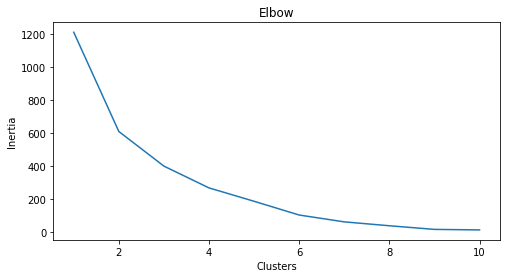

In [122]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data_pca)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Dari hasil metode elbow diatas, kita dapat menentukan bahwa nilai optimal klaster berada disekitaran 2 klaster. Namun jumlah ini terlalu sedikit sehingga kita akan menggunakan 3 klaster

In [150]:
model_kmeans = KMeans(n_clusters=3)

model_kmeans.fit(data_pca)

data_cluster['KLASTER K-MEANS'] = model_kmeans.labels_

data_cluster

,PCA 1,PCA 2,KLASTER K-MEANS,KLASTER K-MEDOIDS,KLASTER AGGLOMERATIVE,KLASTER DBSCAN
0,0.917039,0.638754,0,2,1,0
1,-0.577011,-0.659150,2,3,0,1
2,-0.550264,-0.657950,2,3,0,1
3,0.298150,-0.046075,0,2,1,2
4,-0.549239,0.088510,2,0,0,1
...,...,...,...,...,...,...
1995,-0.533068,-0.606965,2,3,0,1
1996,0.286939,-0.564561,0,3,3,2
1997,-0.568536,0.011745,2,0,0,1
1998,-0.559811,0.782038,1,1,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


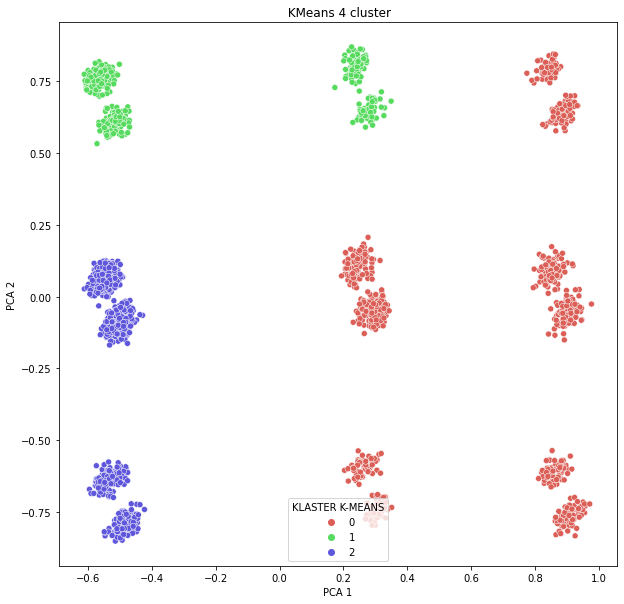

In [152]:
plt.figure(figsize=(10,10))
sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER K-MEANS'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 4 cluster')
plt.show()

## Pengklasteran K-Medoids

In [125]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [153]:
model_kmedoids = KMedoids(n_clusters=3,method="pam")

model_kmedoids.fit(data_pca)

data_cluster['KLASTER K-MEDOIDS'] = model_kmedoids.labels_

data_cluster

,PCA 1,PCA 2,KLASTER K-MEANS,KLASTER K-MEDOIDS,KLASTER AGGLOMERATIVE,KLASTER DBSCAN
0,0.917039,0.638754,0,1,1,0
1,-0.577011,-0.659150,2,0,0,1
2,-0.550264,-0.657950,2,0,0,1
3,0.298150,-0.046075,0,1,1,2
4,-0.549239,0.088510,2,0,0,1
...,...,...,...,...,...,...
1995,-0.533068,-0.606965,2,0,0,1
1996,0.286939,-0.564561,0,1,3,2
1997,-0.568536,0.011745,2,0,0,1
1998,-0.559811,0.782038,1,2,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


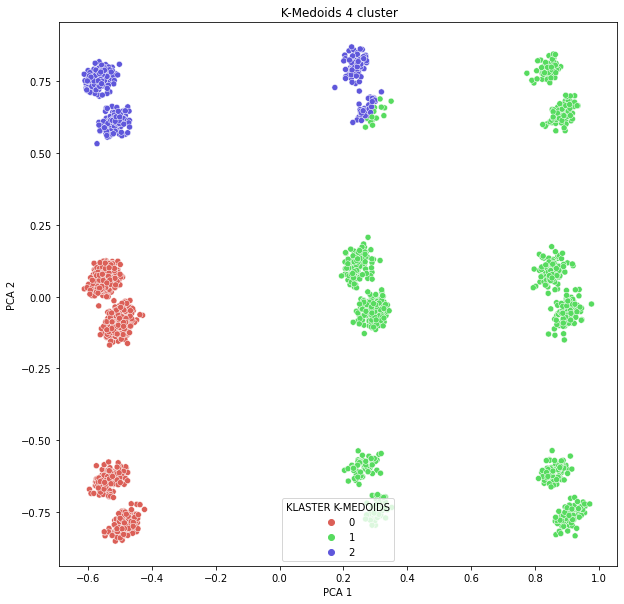

In [155]:
plt.figure(figsize=(10,10))
sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER K-MEDOIDS'], palette=sns.color_palette('hls',3))
plt.title(' K-Medoids 4 cluster')
plt.show()

## Pengklasteran Hirarki

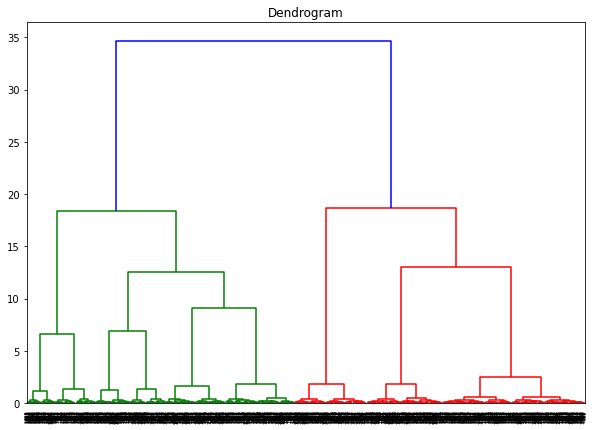

In [161]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data_pca, method="ward"))


In [156]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data_pca)

data_cluster['KLASTER AGGLOMERATIVE'] = model_agglo.labels_

data_cluster

,PCA 1,PCA 2,KLASTER K-MEANS,KLASTER K-MEDOIDS,KLASTER AGGLOMERATIVE,KLASTER DBSCAN
0,0.917039,0.638754,0,1,0,0
1,-0.577011,-0.659150,2,0,1,1
2,-0.550264,-0.657950,2,0,1,1
3,0.298150,-0.046075,0,1,0,2
4,-0.549239,0.088510,2,0,1,1
...,...,...,...,...,...,...
1995,-0.533068,-0.606965,2,0,1,1
1996,0.286939,-0.564561,0,1,0,2
1997,-0.568536,0.011745,2,0,1,1
1998,-0.559811,0.782038,1,2,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


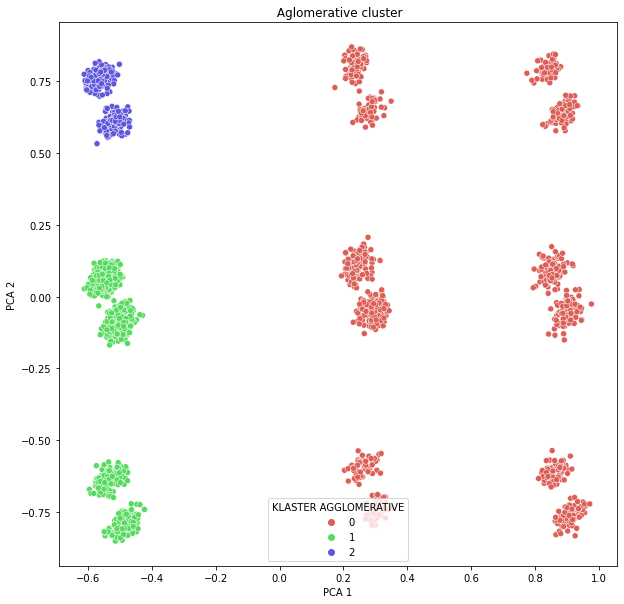

In [158]:
plt.figure(figsize=(10,10))
sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER AGGLOMERATIVE'], palette=sns.color_palette('hls',3))
plt.title(' Aglomerative cluster')
plt.show()

## Pengklasteran DBSCAN

In [143]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(min_samples=4, eps=0.415)
model_dbscan.fit(data_pca)

data_cluster['KLASTER DBSCAN'] = model_dbscan.labels_

data_cluster

,PCA 1,PCA 2,KLASTER K-MEANS,KLASTER K-MEDOIDS,KLASTER AGGLOMERATIVE,KLASTER DBSCAN
0,0.917039,0.638754,2,2,1,0
1,-0.577011,-0.659150,1,3,0,1
2,-0.550264,-0.657950,1,3,0,1
3,0.298150,-0.046075,2,2,1,2
4,-0.549239,0.088510,1,0,0,1
...,...,...,...,...,...,...
1995,-0.533068,-0.606965,1,3,0,1
1996,0.286939,-0.564561,0,3,3,2
1997,-0.568536,0.011745,1,0,0,1
1998,-0.559811,0.782038,3,1,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


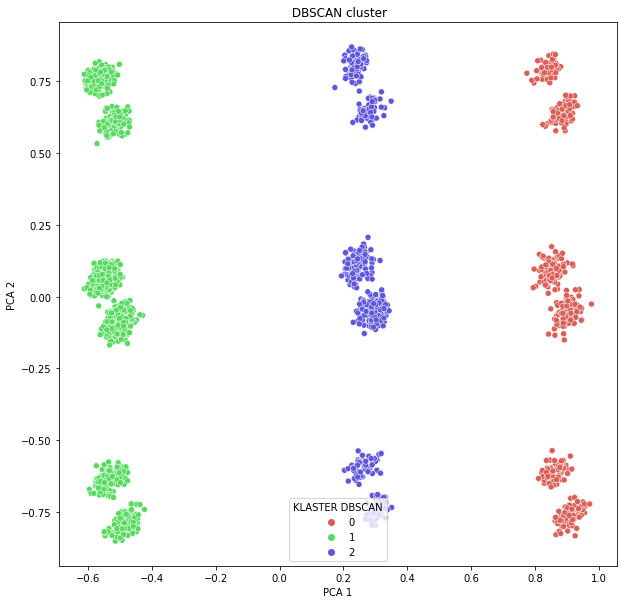

In [144]:
plt.figure(figsize=(10,10))
sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER DBSCAN'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN cluster')
plt.show()

Hasil dari DBSCAN ini memberikan 3 klaster. Hasil ini sangat dipengaruhi oleh parameter epsilon dan min_sample

## Perbandingan Hasil Klaster dari 4 metode yang digunakan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'DBSCAN Clustering')

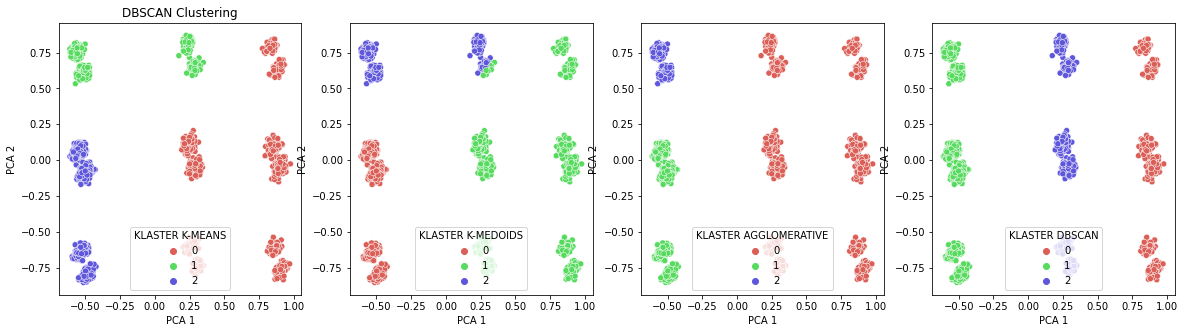

In [167]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER K-MEANS'], palette=sns.color_palette('hls',3),ax=ax[0])
ax[0].set_title("K-Means Clustering")

sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER K-MEDOIDS'], palette=sns.color_palette('hls',3),ax=ax[1])
ax[0].set_title("K-Medoids Clustering")

sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER AGGLOMERATIVE'], palette=sns.color_palette('hls',3),ax=ax[2])
ax[0].set_title("Agglomerative Clustering")

sns.scatterplot(data_cluster['PCA 1'], data_cluster['PCA 2'], hue=data_cluster['KLASTER DBSCAN'], palette=sns.color_palette('hls',3),ax=ax[3])
ax[0].set_title("DBSCAN Clustering")